In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

import numpy as np
from time import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

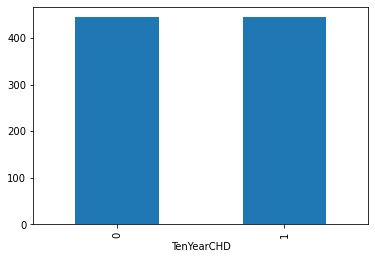

In [2]:
df = pd.read_csv(r'C:\Users\Chulabutrach\Documents\Coding\Projects\pttgc\neural_network\data\CardiovascularStudyDataset\train.csv')
df['sex_numeric'] = df['sex'].apply(lambda x: 1 if x == 'F' else 0)
df['is_smoking_numeric'] = df['is_smoking'].apply(lambda x: 1 if x == 'YES' else 0)
df = df.dropna(axis=0).reset_index(drop=True)
df_good = df.loc[df['TenYearCHD'] == 1]
df_bad = df.loc[df['TenYearCHD'] == 0]

df_bad = df_bad.sample(n=len(df_good), random_state=10)
df = df_good.append(df_bad).reset_index(drop=True)
df = df.sample(frac=1).reset_index(drop=True)
df.groupby('TenYearCHD').id.nunique().plot.bar()

df = df.drop(['id', 'sex', 'is_smoking'], axis=1)

In [3]:
df.head()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_numeric,is_smoking_numeric
0,56,3.0,5.0,0.0,0,0,0,230.0,123.0,78.5,24.71,76.0,87.0,1,1,1
1,63,1.0,0.0,0.0,0,1,0,320.0,155.0,81.0,31.71,64.0,80.0,1,1,0
2,41,2.0,0.0,0.0,0,0,0,235.0,143.5,90.0,26.22,70.0,83.0,0,1,0
3,45,2.0,0.0,0.0,0,0,0,262.0,133.0,83.0,22.19,76.0,92.0,1,1,0
4,47,1.0,0.0,0.0,0,0,0,200.0,126.0,86.0,26.32,73.0,92.0,1,1,0


In [4]:
x = df
y = np.array(x.pop('TenYearCHD'))
x = np.array(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)

In [5]:
model = LogisticRegression().fit(x_train, y_train)

C:\Users\Chulabutrach\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
predictions = model.predict(x_test)

In [7]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.62      0.68        53
           1       0.56      0.69      0.62        36

    accuracy                           0.65        89
   macro avg       0.65      0.66      0.65        89
weighted avg       0.67      0.65      0.65        89



In [8]:
print(confusion_matrix(y_test, predictions))

[[33 20]
 [11 25]]


In [9]:
model2 = LinearDiscriminantAnalysis().fit(x_train, y_train)
predictions2 = model2.predict(x_test)
print(classification_report(y_test, predictions2))
print(confusion_matrix(y_test, predictions2))

              precision    recall  f1-score   support

           0       0.75      0.68      0.71        53
           1       0.59      0.67      0.62        36

    accuracy                           0.67        89
   macro avg       0.67      0.67      0.67        89
weighted avg       0.68      0.67      0.68        89

[[36 17]
 [12 24]]
